## kartik
### Assignment 19

## Predict whether the person is having diabetes or not

### 1.Logistic Regression
### 2. Decision Tree
### 3. Random Forest
### 4. Adaptive Boosting
### 5. Gradient Boosting
### Compare the results and tell which algorithm is good for predicting the person is diabetic or not

# 1.Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
db=pd.read_csv("diabetes - diabetes.csv")

In [3]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   759 non-null    float64
 2   BloodPressure             741 non-null    float64
 3   SkinThickness             747 non-null    float64
 4   Insulin                   732 non-null    float64
 5   BMI                       746 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       762 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


C:\Users\keerti chouhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

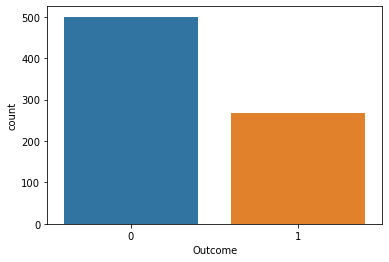

In [5]:
sns.countplot(db['Outcome'],label='abs_values')

In [6]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,759.000000,741.000000,747.000000,732.000000,746.000000,752.000000,762.000000,768.000000
mean,3.844850,121.001318,69.026991,20.416332,78.285519,32.013673,0.472758,33.236220,0.348958
std,3.371772,32.071511,19.378222,15.976672,113.071200,7.896529,0.332823,11.784725,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.325000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,22.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,126.250000,36.600000,0.624500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
db.isna().sum()

Pregnancies                  1
Glucose                      9
BloodPressure               27
SkinThickness               21
Insulin                     36
BMI                         22
DiabetesPedigreeFunction    16
Age                          6
Outcome                      0
dtype: int64

In [8]:
db['Pregnancies'].fillna(db['Pregnancies'].mean(),inplace=True)
db['Glucose'].fillna(db['Glucose'].mean(),inplace=True)
db['BloodPressure'].fillna(db['BloodPressure'].mean(),inplace=True)
db['SkinThickness'].fillna(db['SkinThickness'].mean(),inplace=True)
db['Insulin'].fillna(db['Insulin'].mean(),inplace=True)
db['BMI'].fillna(db['BMI'].mean(),inplace=True)
db['DiabetesPedigreeFunction'].fillna(db['DiabetesPedigreeFunction'].mean(),inplace=True)
db['Age'].fillna(db['Age'].mean(),inplace=True)

In [9]:
db.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
x=db[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=db['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=52)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model= LogisticRegression()

In [53]:
model.fit(x_train,y_train)

C:\Users\keerti chouhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
predictions=model.predict(x_test)

In [18]:
predictions

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

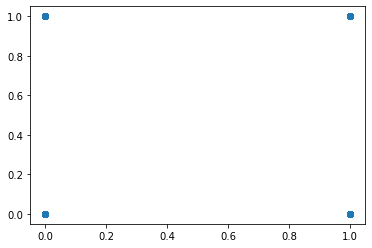

In [19]:
plt.scatter(y_test,predictions)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [22]:
print(confusion_matrix(y_test,predictions))

[[87 13]
 [21 33]]


# Decision  Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree=DecisionTreeClassifier()

In [25]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
pridiction1=dtree.predict(x_test)

In [27]:
pridiction1

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64)

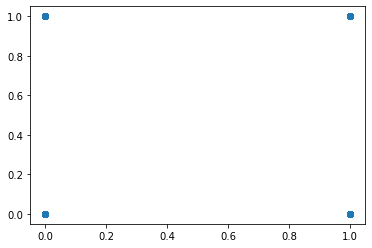

In [28]:
plt.scatter(y_test,predictions)

In [29]:
print(classification_report(y_test,pridiction1))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       100
           1       0.56      0.67      0.61        54

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.70      0.71       154



In [30]:
print(confusion_matrix(y_test,pridiction1))

[[72 28]
 [18 36]]


# .Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
rfc=RandomForestClassifier(n_estimators=600)


In [33]:
rfc.fit(x_train,y_train)



RandomForestClassifier(n_estimators=600)

In [34]:
pridiction2=rfc.predict(x_test)


In [35]:
pridiction2

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,pridiction2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154



In [38]:
print(confusion_matrix(y_test,pridiction2))

[[88 12]
 [19 35]]


# 4.Adaptive Boosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:

Ada= AdaBoostClassifier(n_estimators=150)



In [41]:

Ada.fit(x_train,y_train)


AdaBoostClassifier(n_estimators=150)

In [42]:

pridiction3=Ada.predict(x_test)


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,pridiction3))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       100
           1       0.54      0.52      0.53        54

    accuracy                           0.68       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



In [45]:
print(confusion_matrix(y_test,pridiction3))

[[76 24]
 [26 28]]


# 5Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
GD= AdaBoostClassifier(n_estimators=200)


In [48]:
GD.fit(x_train,y_train)


AdaBoostClassifier(n_estimators=200)

In [49]:
pridiction4=GD.predict(x_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,pridiction4))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.56      0.52      0.54        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154

